<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Application-1:-Diamonds" data-toc-modified-id="Application-1:-Diamonds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Application 1: Diamonds</a></span><ul class="toc-item"><li><span><a href="#Etapa-1:-Carregar-e-transformar-os-Dados" data-toc-modified-id="Etapa-1:-Carregar-e-transformar-os-Dados-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Etapa 1: Carregar e transformar os Dados</a></span></li><li><span><a href="#Etapa-2:-Normalizar-os-dados" data-toc-modified-id="Etapa-2:-Normalizar-os-dados-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Etapa 2: Normalizar os dados</a></span></li><li><span><a href="#Etapa-3:-PCA-Projection-to-2D" data-toc-modified-id="Etapa-3:-PCA-Projection-to-2D-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Etapa 3: PCA Projection to 2D</a></span></li><li><span><a href="#Etapa-4:-Análise" data-toc-modified-id="Etapa-4:-Análise-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Etapa 4: Análise</a></span><ul class="toc-item"><li><span><a href="#Visualização-de-dados" data-toc-modified-id="Visualização-de-dados-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Visualização de dados</a></span></li><li><span><a href="#Variância-Explicada" data-toc-modified-id="Variância-Explicada-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>Variância Explicada</a></span></li><li><span><a href="#Análise-dos-Loadings" data-toc-modified-id="Análise-dos-Loadings-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>Análise dos Loadings</a></span></li></ul></li></ul></li><li><span><a href="#Application-2:-Simulation" data-toc-modified-id="Application-2:-Simulation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Application 2: Simulation</a></span><ul class="toc-item"><li><span><a href="#Simulando-os-dados" data-toc-modified-id="Simulando-os-dados-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Simulando os dados</a></span></li><li><span><a href="#Modelando" data-toc-modified-id="Modelando-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Modelando</a></span></li><li><span><a href="#O-que-está-acontecendo?" data-toc-modified-id="O-que-está-acontecendo?-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>O que está acontecendo?</a></span></li></ul></li><li><span><a href="#Application-3:-NLP" data-toc-modified-id="Application-3:-NLP-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Application 3: NLP</a></span><ul class="toc-item"><li><span><a href="#Carregando-dados" data-toc-modified-id="Carregando-dados-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Carregando dados</a></span></li><li><span><a href="#Conhecendo-o-CountVectorizer" data-toc-modified-id="Conhecendo-o-CountVectorizer-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Conhecendo o CountVectorizer</a></span></li><li><span><a href="#Reduzindo-o-vocabulário" data-toc-modified-id="Reduzindo-o-vocabulário-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Reduzindo o vocabulário</a></span></li><li><span><a href="#Modelando" data-toc-modified-id="Modelando-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Modelando</a></span></li></ul></li></ul></li></ul></div>

In [4]:
import psycopg2, random
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Principal Component Analysis 
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [14]:
def simular_dado_mv_x(parametros_x1, parametros_x2, samples):
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    x2 = x1 + np.random.normal(loc=parametros_x2[0], 
                               scale=parametros_x2[1], 
                               size=samples)
    return pd.DataFrame({'x1': x1, 'x2': x2,})

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
tb_simul_x = simular_dado_mv_x((0, 5), (0, 1), 100)

<AxesSubplot:xlabel='x1', ylabel='x2'>

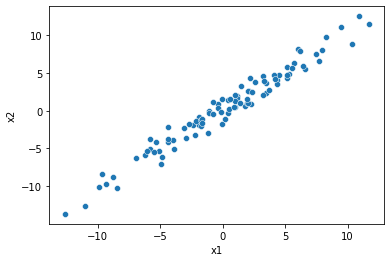

In [17]:
sns.scatterplot(data = tb_simul_x, x = 'x1', y = 'x2')

In [18]:


norm = StandardScaler().fit(tb_simul_x)

X_norm = norm.transform(tb_simul_x)

pca_t = PCA(n_components = 2)

pca_t.fit(X_norm)

pca_X_norm = pca_t.transform(X_norm)

In [19]:
pca_X_norm[0:5,:]

array([[ 1.78429893, -0.28887728],
       [ 1.95589823,  0.11291492],
       [ 0.68357784, -0.2533787 ],
       [-0.32777344,  0.08533257],
       [ 1.03530336,  0.3093211 ]])

In [20]:
tb_pca_x = pd.DataFrame(pca_X_norm, columns = ['PC1', 'PC2'])
tb_full_x = pd.concat([tb_pca_x, tb_simul_x], axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

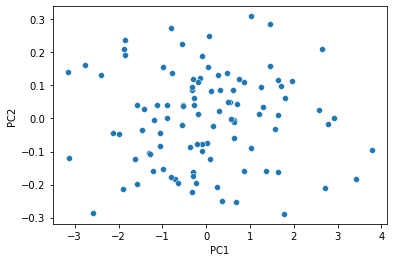

In [21]:
sns.scatterplot(data = tb_full_x, x = 'PC1', y = 'PC2')

In [13]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=tb_simul_x.columns)
loadings

ValueError: Shape of passed values is (2, 2), indices imply (4, 2)

## Application 1: Diamonds

### Etapa 1: Carregar e transformar os Dados

In [ ]:
def etl_diamonds(diamonds):
    x_0 = diamonds['x'] == 0
    y_0 = diamonds['y'] == 0
    z_0 = diamonds['z'] == 0
    dim_0 = x_0 | y_0 | z_0
    diamonds_c = diamonds[~dim_0].copy()
    print('Linhas na etapa atual:', str(len(diamonds_c)))
    dict_clarity = {
        'I1': 0,
        'SI2': 1,
        'SI1': 2,
        'VS2': 3,
        'VS1': 4,
        'VVS2': 5,
        'VVS1': 6,
        'IF': 7
    }
    diamonds_c['clarity_num'] = diamonds_c['clarity'].map(dict_clarity)
    dict_color = {
        'D': 0,
        'E': 1,
        'F': 2,
        'G': 3,
        'H': 4,
        'I': 5,
        'J': 6,
    }
    diamonds_c['color_num'] = diamonds_c['color'].map(dict_color)
    dict_cut = {
        'Fair': 0,
        'Good': 1,
        'Very Good': 2,
        'Premium': 3,
        'Ideal': 4,
    }
    diamonds_c['cut_num'] = diamonds_c['cut'].map(dict_cut)
    diamonds_c['volume'] = diamonds_c['x'] * diamonds_c['y'] * diamonds_c['z']
    diamonds_c['price_k'] = diamonds_c['price']/diamonds_c['carat']
    diamonds_c['density'] = diamonds_c['carat']/diamonds_c['volume']
    pricek_inf = np.quantile(diamonds_c['price_k'], 0.01)
    pricek_sup = np.quantile(diamonds_c['price_k'], 0.99)
    density_inf = np.quantile(diamonds_c['density'], 0.01)
    density_sup = np.quantile(diamonds_c['density'], 0.99)
    pricek_in = (pricek_inf < diamonds_c['price_k']) &  (diamonds_c['price_k'] < pricek_sup)
    density_in = (density_inf < diamonds_c['density']) &  (diamonds_c['density'] < density_sup)
    diamonds_c = diamonds_c[pricek_in & density_in].copy()
    
    diamonds_c['log_carat'] = np.log(diamonds_c['carat'])
    diamonds_c['log_price'] = np.log(diamonds_c['price'])
    diamonds_c = diamonds_c.drop(['cut', 'color', 'price', 'clarity', 'price_k', 'density', 'carat', 'clarity'],
                                axis = 1)
    return diamonds_c

In [ ]:
diamonds = pd.read_csv('data/tb_diamantes.csv')
diamonds_c = etl_diamonds(diamonds)
diamonds_c.columns

In [ ]:
diamonds_c.head()

### Etapa 2: Normalizar os dados

In [ ]:
X = diamonds_c[['depth', 'table', 'x', 'y', 'z', 'clarity_num', 'color_num',
       'cut_num', 'volume', 'log_carat']]
norm = StandardScaler().fit(X)
X_norm = norm.transform(X)

In [ ]:
X_norm.shape

In [ ]:
diamonds_c_norm = np.append(X_norm, diamonds_c[['log_price']].to_numpy(), axis = 1)

In [ ]:
tb_diamonds_norm = pd.DataFrame(diamonds_c_norm,
                            columns=diamonds_c.columns)

In [ ]:
sns.pairplot(tb_diamonds_norm)

### Etapa 3: PCA Projection to 2D
* 4 dimensions -> 2 dimensions
* You lose some of the variance (information) when you do this

In [ ]:
X = tb_diamonds_norm.drop('log_price', axis = 1)
pca_t = PCA(n_components = 2)
pca_t.fit(X)
pca_X_norm = pca_t.transform(X)

In [ ]:
tb_pca_diam = pd.DataFrame(pca_X_norm, columns = ['PC1', 'PC2'])
tb_pca_diam['log_price'] = tb_diamonds_norm['log_price']

### Etapa 4: Análise

#### Visualização de dados

In [ ]:
sns.scatterplot(data = tb_pca_diam, x = 'PC1', y = 'PC2', hue = 'log_price')

In [ ]:
sns.pairplot(tb_pca_diam)

#### Variância Explicada

In [ ]:
pca_t.explained_variance_ratio_

In [ ]:
sum(pca_t.explained_variance_ratio_)

In [ ]:
2/(len(tb_diamonds_norm.columns) - 1)

#### Análise dos Loadings

In [ ]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=X.columns)
loadings

In [ ]:
plt.figure(figsize = (7,7))
p1 = sns.scatterplot(data=loadings, x='PC1', y='PC2')
for line in range(0, loadings.shape[0]):
    p1.text(loadings.iloc[line, 0] + 0.05,
            loadings.iloc[line, 1],
            loadings.index[line],
            horizontalalignment='left',
            size='medium',
            color='black')

## Application 2: Simulation

The PCA algorithm will try to find the directions in which the most information is contained. By information, we always mean to say - variance.

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

### Simulando os dados

In [ ]:
def simular_dado_mv(parametros_x1, parametros_x2, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    x2 = x1 + np.random.normal(loc=parametros_x2[0], 
                               scale=parametros_x2[1], 
                               size=samples)
    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)
    y = parametros_x1[2] * x1 + parametros_x2[2] * x2 + E
    x3 = (desvpad_E/2)*y + np.random.normal(loc = 0, scale = desvpad_E * 3, size = samples)
    return pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3' : x3})

In [ ]:
tb_sim = simular_dado_mv((0, 10, 2), (0, 5, -2), 4, 100)

In [ ]:
sns.pairplot(tb_sim)

### Modelando

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(tb_sim[['x3']])
Y = tb_sim['y']
reg = sm.OLS(Y, X)
lm_fit_x3 = reg.fit()
print("RMSE: ", str(round(np.std(lm_fit.resid), 2)))

In [ ]:
X = sm.add_constant(tb_sim[['x1', 'x2']])
Y = tb_sim['y']
reg = sm.OLS(Y, X)
lm_fit_x12 = reg.fit()
print("RMSE: ", str(round(np.std(lm_fit.resid), 2)))

### O que está acontecendo?

In [ ]:
lm_fit_x12.summary()

In [ ]:
norm = StandardScaler().fit(tb_sim[['x1', 'x2']])
pca_t = PCA(n_components = 2)
pca_t.fit(norm.transform(tb_sim[['x1', 'x2']]))

In [ ]:
np.cumsum(pca_t.explained_variance_)

In [ ]:
loadings = pd.DataFrame(pca_t.components_.T)
loadings

In [ ]:
X_pca = pd.DataFrame(pca_t.transform(tb_sim[['x1', 'x2']]))
tb_sim_pca = pd.concat([tb_sim, X_pca], axis = 1)
sns.pairplot(tb_sim_pca)

## Application 3: NLP

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

### Carregando dados

In [ ]:
food = pd.read_csv('data/Food Composition.csv')

In [ ]:
food.head()

In [ ]:
food['text'] = food['Food Name'] + " " + food['Food Description']

### Conhecendo o CountVectorizer

In [ ]:
ck = CountVectorizer(stop_words = 'english')
ck_fit = ck.fit_transform(food['text'])
X = ck_fit.toarray()

### Reduzindo o vocabulário

In [ ]:
norm = Normalizer().fit(X)
pca_t = PCA(n_components = 30)
pca_t.fit(norm.transform(X))

In [ ]:
np.cumsum(pca_t.explained_variance_)

In [ ]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        index=ck.get_feature_names())
loadings.sort_values(0, ascending = False).head(10)

### Modelando

In [ ]:
X_pca = pd.DataFrame(pca_t.transform(X))
X_pca['fat'] = food['Fat Factor']
fat_pca = X_pca[X_pca['fat'] > 0].copy()

In [ ]:
X = sm.add_constant(fat_pca[range(30)])
Y = fat_pca['fat']

In [ ]:
reg = sm.OLS(Y, X)
lm_fit = reg.fit()
lm_fit.summary()

In [ ]:
fat_pca['pred_fat'] = lm_fit.predict()

In [ ]:
fat_pca['ape'] = abs(fat_pca['pred_fat'] - fat_pca['fat'])/fat_pca['fat']

In [ ]:
np.mean(fat_pca['ape'])

In [ ]:
sns.histplot(data = fat_pca, x ='ape')